In [1]:
%matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
db_path = 'Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{db_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


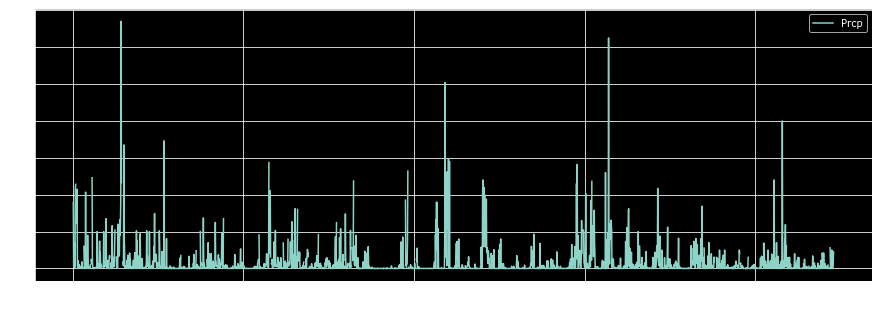

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(date)
# Perform a query to retrieve the data and precipitation scores
prec_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dataframe = pd.DataFrame(prec_scores, columns=['Date', 'Prcp'])
dataframe.set_index('Date', inplace=True)

# Sort the dataframe by date
dataframe = dataframe.sort_values(['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
ax = dataframe.plot(figsize=(15,5))
ax.set_ylabel('Precipitation in Inches')
ax.grid()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataframe.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
info = [measurement.station,
        func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)]
info_results = session.query(*info).filter(measurement.station == 'USC00519281').group_by(measurement.station).all()

for result in info_results:
    print(f'Lowest: {result[1]}')
    print(f'Hightest: {result[2]}')
    print(f'Average: {result[3]}')

Lowest: 54.0
Hightest: 85.0
Average: 71.66378066378067


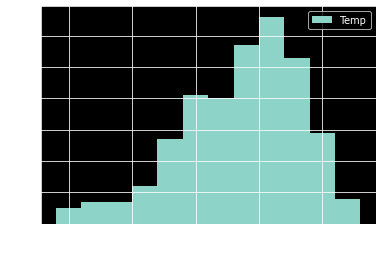

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = pd.DataFrame(session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= dt.date(2016,8,23)).all(), columns=['Temp'])
temp_obs.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.grid()
plt.show()

# Close session

In [16]:
# Close Session
session.close()